In [143]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

data = pd.read_excel('A2Sales.xlsx')
data

,DateTime_Of_Purchase,Customer_ID,Network_Address,Product_Name_List,Product_Code_List,Number_of_Items_Per_Product,Coupon_If_Used,Suburb,State,DOB,Purchase_Amount
0,2017-10-03 23:35:16,1,121.215.208.81,"L8 Either Or Jeans - Unisex,Quartz Nylon - Men's","LE893AA85WNE,LE451SH96MNF","1,1",NaN,Leura,NSW,1975-10-20,113.55
1,2017-10-14 04:55:00,2,49.197.37.187,"Anja Frill Knit Top,Josie PU Cropped Jacket","AT049AA47CYY,AT049AA81VOG","1,1",NaN,Spring Hill,QLD,NaT,81.78
2,2017-10-04 10:37:33,3,220.245.76.109,Long Line Short Tights,LO569SA37LES,1,NaN,Toronto,NSW,1986-02-27,63.63
3,2017-10-08 04:20:43,4,210.185.88.244,Toni Lightweight Waterfall Trench,AT049AA46EFP,1,NaN,Prahran,VIC,1988-05-18,81.77
4,2017-10-05 07:48:59,5,110.175.240.246,Nina Printed Pants,AT049AA69ZXE,2,NaN,Maroubra,NSW,NaT,127.18
...,...,...,...,...,...,...,...,...,...,...,...
46952,2017-10-17 22:26:52,44098,114.74.65.38,"Noosa Strappy Briefs,Salsa Dress","AT049AA24JEP,FR760AA82WXX","1,1",NaN,Auburn,NSW,NaT,47.25
46953,2017-10-18 13:17:40,44100,141.168.65.138,Doritt,TH164SH16NUX,1,NaN,Mernda,VIC,NaT,30.87
46954,2017-10-02 05:44:15,44101,58.107.238.117,Cocktail Draped Dress,SH045AA34KEF,1,20NEWBIEFR,Caringbah South,NSW,2001-08-23,236.36
46955,2017-10-15 20:28:28,44102,202.67.68.182,"Nike DF Epic Run Crop Tights,Cuban,Curve Singl...","NI126SA99UZK,BI358SH35RMI,AS787AA14UBL,AM901AA...","1,1,1,1,1",SPRING,Roseville,NSW,1991-06-29,257.19


**1) Company’s sales Performance**

In [144]:
data['Purchase Year'] = data.DateTime_Of_Purchase.apply(lambda x: x.year)
df_revenue = data.groupby(['Purchase Year'])['Purchase_Amount'].sum().reset_index()
df_revenue

,Purchase Year,Purchase_Amount
0,2017,6382243.72


In [145]:
variable = data['Purchase_Amount'].mean()
variable

135.9167689588346

**2) Products that are more likely to be purchased together**

In [146]:
df = data.assign(Product_Name_List = data.Product_Name_List.str.split(",")).explode('Product_Name_List').reset_index()
df2 = pd.DataFrame().assign(DateTime_Of_Purchase=df['DateTime_Of_Purchase'],Product_Name_List=df['Product_Name_List'])

In [147]:
df3 = df2.merge(df2, on='DateTime_Of_Purchase')
(df3[df3['Product_Name_List_x'].lt(df3['Product_Name_List_y'])]
    .groupby(['DateTime_Of_Purchase', 'Product_Name_List_x', 'Product_Name_List_y'])          
    .size()      
    .sum(level=[1,2])      
    .idxmax()     
)

<ipython-input-147-f3cbe5214201>:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  (df3[df3['Product_Name_List_x'].lt(df3['Product_Name_List_y'])]


('Modern Cotton Bralette', 'Modern Cotton Thong')

In [148]:
data.describe()

,Customer_ID,Purchase_Amount,Purchase Year
count,46957.000000,46957.000000,46957.0
mean,22044.102668,135.916769,2017.0
std,12746.319421,135.009036,0.0
min,1.000000,0.000000,2017.0
25%,11000.000000,63.590000,2017.0
50%,22018.000000,99.870000,2017.0
75%,33104.000000,163.620000,2017.0
max,44103.000000,5387.710000,2017.0


In [149]:
data.shape

(46957, 12)

**3) Segments of Customers**

In [150]:
data.DateTime_Of_Purchase.max()

Timestamp('2017-10-21 23:58:59')

In [151]:
import datetime as dt
c_date = dt.datetime(2017, 10, 22)
rfm_data = data.groupby('Customer_ID').agg({
                        'DateTime_Of_Purchase' : lambda x : (c_date - x.max()).days, 
                        'Product_Name_List' : lambda x : x.count(), 
                        'Purchase_Amount' : lambda x : sum(x) })
rfm_data.rename(columns = {
                        'DateTime_Of_Purchase' : 'Recency', 
                        'Product_Name_List' : 'Frequency', 
                        'Purchase_Amount' : 'Monetary' }, inplace = True)

rfm_data.reset_index(inplace = True)

In [152]:
rfm_data.head(80)

,Customer_ID,Recency,Frequency,Monetary
0,1,18,1,113.55
1,2,7,1,81.78
2,3,17,1,63.63
3,4,13,1,81.77
4,5,16,1,127.18
...,...,...,...,...
75,79,13,1,122.13
76,80,14,2,163.58
77,81,7,3,404.37
78,83,3,1,272.59


In [153]:
rfm_data.describe()

,Customer_ID,Recency,Frequency,Monetary
count,41503.000000,41503.000000,41503.000000,41503.000000
mean,22038.503072,10.176541,1.131412,153.777889
std,12735.264232,5.781038,0.786575,165.573883
min,1.000000,0.000000,1.000000,0.000000
25%,11015.500000,5.000000,1.000000,65.420000
50%,22023.000000,10.000000,1.000000,109.000000
75%,33064.000000,16.000000,1.000000,181.770000
max,44103.000000,20.000000,96.000000,5387.710000


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


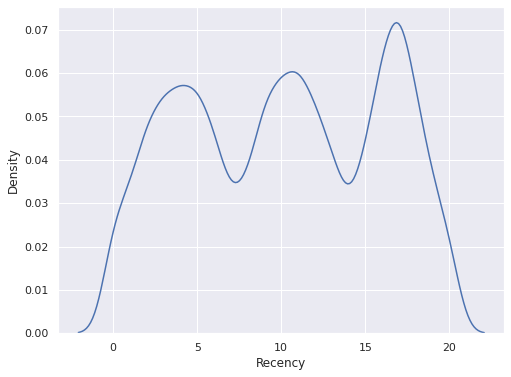

In [154]:

sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.distplot(rfm_data.Recency, hist = False, color = 'b')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


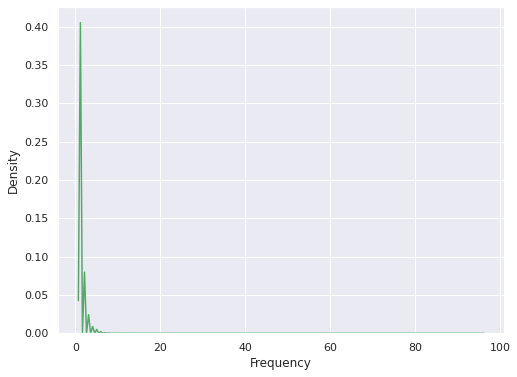

In [155]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))

# plotting only Frequency 
sns.distplot(rfm_data.Frequency, hist = False, color = 'g')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


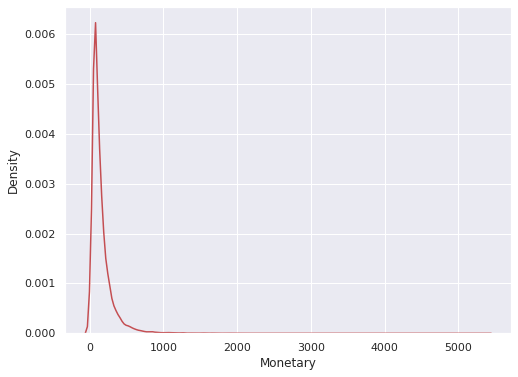

In [156]:
sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))

# plotting only Monetory

sns.distplot(rfm_data.Monetary, hist = False, color = 'r')


In [157]:
quantiles = rfm_data.quantile(q = [0.25, 0.5, 0.75 ]) #using quantile function to get value of quantiles
quantiles = quantiles.to_dict() # coverting into dictionary for easier mapping 
quantiles

{'Customer_ID': {0.25: 11015.5, 0.5: 22023.0, 0.75: 33064.0},
 'Recency': {0.25: 5.0, 0.5: 10.0, 0.75: 16.0},
 'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 1.0},
 'Monetary': {0.25: 65.4199999999999, 0.5: 109.0, 0.75: 181.769999999999}}

In [158]:
import math
X_train = rfm_data.iloc[:, [1, 2, 3]]
X_train.Recency = rfm_data.Recency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3)) 
X_train.Frequency = rfm_data.Frequency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))
X_train.Monetary = rfm_data.Monetary.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


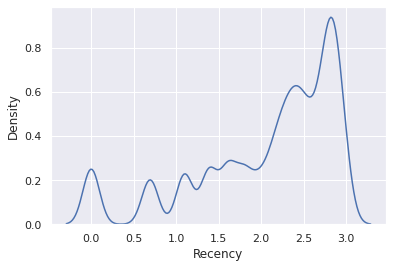

In [159]:
sns.distplot(X_train['Recency'], hist = False, color = 'b')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


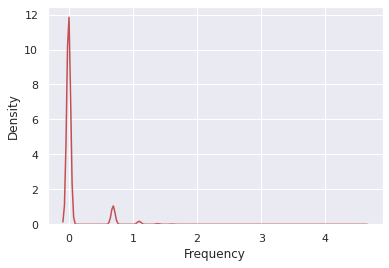

In [160]:
sns.distplot(X_train['Frequency'], hist = False, color = 'r')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


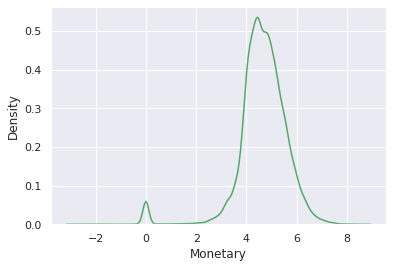

In [161]:
sns.distplot(X_train['Monetary'], hist = False, color = 'g')

In [162]:
from sklearn.preprocessing import StandardScaler as scaler

sc = scaler() # create instance of Standardscaler

Scaled_Data = sc.fit_transform(X_train) # applying transformation to X_train

Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm_data.index, columns = X_train.columns) # changing into dataframe again

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


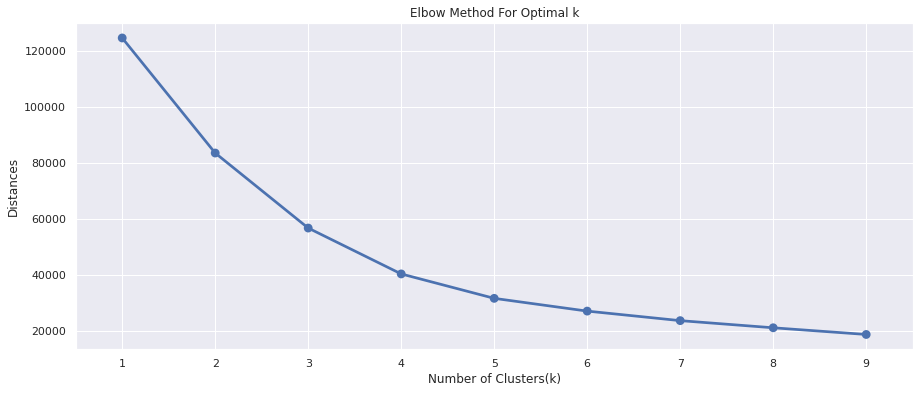

In [165]:
from sklearn.cluster import KMeans

square_dist = [] 
itr = []  

for i in range(1, 10) : 
    model = KMeans(n_clusters = i, max_iter = 1000)
    model.fit(Scaled_Data)
    square_dist.append(model.inertia_)
    itr.append(i)

sns.set_style('darkgrid')
plt.figure(figsize = (15, 6))
sns.pointplot(itr, square_dist, col = 'b')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [166]:
 
model = KMeans(n_clusters = 3, max_iter = 1000)
# fitting scaled dataset into our Kmeans Model
model.fit(Scaled_Data)

rfm_data['Cluster'] = model.labels_

rfm_data.head(5)

,Customer_ID,Recency,Frequency,Monetary,Cluster
0,1,18,1,113.55,0
1,2,7,1,81.78,0
2,3,17,1,63.63,0
3,4,13,1,81.77,0
4,5,16,1,127.18,0


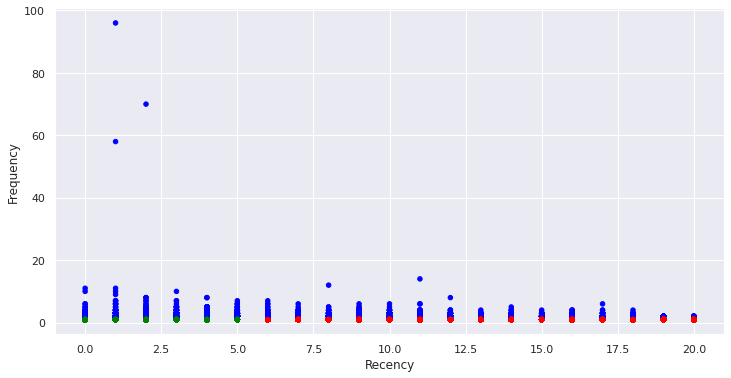

In [167]:
rfm_data['Colour'] = rfm_data['Cluster'].apply(lambda x : 'Red' if x == 0 else ('Green' if x == 2 else 'Blue'))
dist = rfm_data[rfm_data.Frequency < 2000 ] # as most of the frequency value is less than 2000 

dist.plot(x = 'Recency', y = 'Frequency', kind = 'scatter', c = dist['Colour'], figsize = (12, 6))